# Vorlesungswiederholung

Basierd auf den folgenden Quellen [1]

[1][https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.06-Linear-Regression.ipynb]

### Lasso

$$\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$$

Die Schwierigkeit besteht darin Alpha so zu optimieren, dass das Modell die zugrunde liegenden Daten mit optimalem "Grad der Generalisierung" und Varianz wiedergibt.
Als Kriterium kommen der resultierende MSE-Wert (mean squared error) oder sogenannte Informationskriterien wie das Akaike information criterion (AIC) oder das Bayes information criterion (BIC) in Frage. 

Im Folgenden Beispiel wird Alpha anhand des MSE-Werts optimiert. Mit definierten Werten von Alpha werden Modelle bestimmt. Das beste Modell wird mit k-facher Cross-Validierung ausgewählt.

### K-fache Cross-Validierung

Um Overfitting zu erkennen gibt es die Strategie der Cross-Validierung. Damit soll eine möglichst hohe Generalisierung sichergestellt werden. Jede Art von Wissen über die Daten kann schon bei der Selektion von sogenannten "Hyperparametern" (externe Konfigurationsvariablen) die Modellierung beeinflussen. Um diesen Effekt zu minimiern wird das Trainings-Set unterteilt und ein Validierungs-Set erzeugt. Mit dem Validierungs-Set erfolgt eine Vorbewertung des Modells und somit der Hyperparameter. Nach der Modellierung wird das Modell wie gehabt mit den Test-Daten überprüft. 

Durch die weitere Unterteilung senkt sich aber wiederum die Anzahl der verfügbaren Stichproben und das Modell könnte an Aussagekraft verlieren. Die Auswahl der Daten hätte einen zufälligen Einfluss auf das Modell. 

Bei der k-fachen Cross-Validierung wird dieses Problem umgangen, indem die Trainingsdaten in k kleinere Datensätze unterteilt werden. Anschließend werden k Schritte durchlaufen, welche immer den gleichen Ablauf haben: Ein Modell wird anhand von k-1 Trainingdatensätzen erstellt und mit dem übrigen Datensatz validiert (seine Performance bestimmt). Der Durchschnitt aller k Validierungen ergibt die Gesamtperformance. 

<img src="k-fache_Cross_Validierung.png">

In [ ]:
from sklearn.datasets import load_diabetes #Laden von Beispieldaten
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [ ]:
number_of_cross_validations = 5
alpha_values = [0.01, 0.02, 0.03, 0.05, 0.07, 0.08, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
reg = LassoCV(alphas=alpha_values,cv=number_of_cross_validations, random_state=0).fit(X_train, y_train)
print('gewähltes Alpha   '+str(reg.alpha_))
print('R2 Trainingsdaten '+str(reg.score(X_train, y_train)))
print('R2 Testdaten      '+str(reg.score(X_test, y_test)))

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

* np.linspace(x,y,z): Erstellt einen Vektor mit einer Länge von z. Der Wert x wird um das Inkrement von $\frac{1}{z-1}$ bis der Wert y erreicht wird.
* np.sin(x): Sinusfunktion, in Bogenmaß
* np.random.rand(z): Erstellt einen normalverteilten Zufallsvektor mit einer Länge von 50
* plt.errorbar(x,y, yerr=dy, fmt='.k'): x: X-Werte, y: Y-Werte, yerr=Skalierung der Länge der Fehlerbalken, fmt: Format der Punkte (hier als Punkt)

<ErrorbarContainer object of 3 artists>

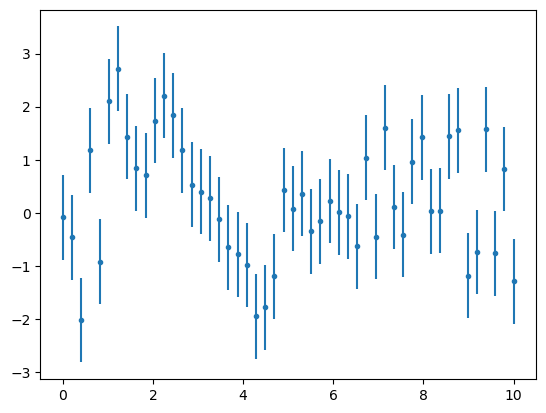

In [2]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.')


In [3]:
def user_defined_funktion(point_density = 1000):
    x = np.linspace(0, 10, point_density)

    y = np.sin(x) + np.random.randn(point_density)
    noise = 0.2
    y = np.sin(x) + noise * np.random.randn(point_density)

    return x, y, noised_y

In [4]:
x, y, noised_y = user_defined_funktion(1000)
plt.plot(x,y, c='r')
plt.scatter(x,noised_y)

NameError: name 'noised_y' is not defined

Einstellen eines lineares Modells aus aus der sklearn-Bibliotek
fit_intercept=True: Modell fittet eine Y-Achsen-Abschnitt

Modell benötigt eine 50x1-Matrix, x ist jedoch eine 50-Vektor -> Anlegen einer neuen Dimension durch x[:, np.newaxis]

In [ ]:
print(x.shape)
print(x[:, np.newaxis].shape)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

In [ ]:
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

Ridge Regression ($L_2$-Regularization)

In [5]:
import pandas as pd
df = pd.read_csv(r"\\129.217.152.140\Team\Helwing\Lehre\MaschineLerning_CT\Luo_Q_2023.1_Vereinfacht.csv", sep=';', decimal='.')
df[:5]

,Power,Speed,Avizo_Porosity_Mean,Avizo_Porosity_Std,Archimedes_porosity_Mean,Archimedes_porosity_Std,Pore_quantity_Sum,Diameter_Avizo_Mean,Diameter_Avizo_Std,Projected_Pore_area_Avg,...,Strength_Mean,Strength_Std,Yield_mean,Yield_Std,Uniform_Mean,Uniform_Std,Ductility_Mean,Ductility_Std,Youngs_Modulus_Mean,Youngs_Modulus_Std
0,275,800,0.8774,0.0452,1.3189,0.8816,44006.0,50.0,15.0,3798.0,...,1021,6,942,10,6.15,0.08,10.70,0.76,112,5.35
1,275,760,1.9382,0.1495,1.8791,0.8775,57383.0,52.0,16.0,3885.0,...,1008,7,931,12,5.81,0.21,9.19,1.06,108,4.31
2,275,720,2.3027,0.5489,2.1131,0.8748,57874.0,52.0,17.0,4046.0,...,992,16,904,35,6.13,0.64,8.98,0.69,109,11.88
3,275,680,1.6876,0.1638,2.3318,0.8728,67526.0,52.0,18.0,4413.0,...,1009,20,929,21,5.52,0.17,8.50,1.33,108,4.15
4,275,640,2.0607,0.0928,2.5762,0.8700,93003.0,50.0,17.0,4040.0,...,995,27,914,35,5.37,0.38,7.23,1.22,113,11.39


Index(['Power', 'Speed', 'Avizo_Porosity_Mean', 'Avizo_Porosity_Std',
       'Archimedes_porosity_Mean', 'Archimedes_porosity_Std',
       'Pore_quantity_Sum', 'Diameter_Avizo_Mean', 'Diameter_Avizo_Std',
       'Projected_Pore_area_Avg', 'Projected_Pore_area_Max',
       'Projected_Pore_area_Sum', 'Sphericity_Avizo_Mean',
       'Sphericity_Avizo_Std', 'Roughness_Avg_Mean', 'Roughness_Avg_Std',
       'Roughness_RMS_Mean', 'Roughness_RMS_Std', 'Grain_diameter_Mean',
       'Grain_diameter_Std', 'Grain_aspect_Mean', 'Grain_aspect_Std',
       'Vicker_Mean', 'Vicker_Std', 'Strength_Mean', 'Strength_Std',
       'Yield_mean', 'Yield_Std', 'Uniform_Mean', 'Uniform_Std',
       'Ductility_Mean', 'Ductility_Std', 'Youngs_Modulus_Mean',
       'Youngs_Modulus_Std'],
      dtype='object')


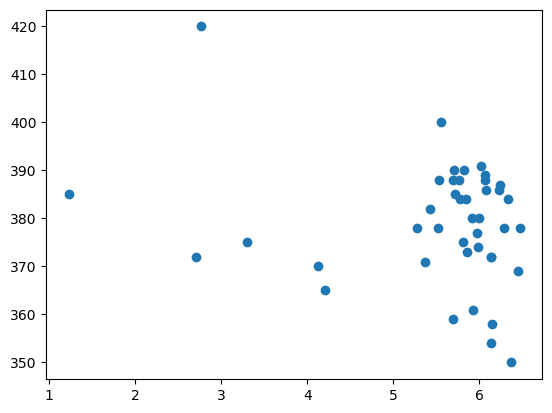

In [6]:
print(df.keys())
plt.scatter(df['Uniform_Mean'], df['Vicker_Mean'])

In [7]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict

mechanical_parameter = ['Strength_Mean', 'Strength_Std', 'Yield_mean', 'Yield_Std', 'Uniform_Mean', 'Uniform_Std',
                        'Ductility_Mean', 'Ductility_Std', 'Youngs_Modulus_Mean', 'Youngs_Modulus_Std']

std_parameter = ['Archimedes_porosity_Std','Diameter_Avizo_Std', 'Sphericity_Avizo_Std', 
                 'Roughness_Avg_Std', 'Roughness_RMS_Std', 'Grain_diameter_Std', 'Grain_aspect_Std', 'Vicker_Std']

pore_parameter = ['Avizo_Porosity_Mean', 'Archimedes_porosity_Mean', 'Archimedes_porosity_Std',
                  'Pore_quantity_Sum', 'Diameter_Avizo_Mean', 'Diameter_Avizo_Std', 'Projected_Pore_area_Avg', 
                  'Projected_Pore_area_Max', 'Projected_Pore_area_Sum', 'Sphericity_Avizo_Mean', 'Sphericity_Avizo_Std', 
                  'Roughness_Avg_Mean', 'Roughness_Avg_Std', 'Roughness_RMS_Mean', 'Roughness_RMS_Std']

# separate train and test sets
x = data.drop(labels=(mechanical_parameter+pore_parameter), axis=1)
y = data['Strength_Mean']

x[:5]

NameError: name 'data' is not defined

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=0)


X_train = X_train.dropna(axis=1)
X_test = X_test.dropna(axis=1)

scaler.fit(X_train)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = cross_val_predict(model, X_train, y_train, cv=5)



from sklearn.metrics import PredictionErrorDisplay
PredictionErrorDisplay.from_predictions(
    y_train,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    random_state=0,
)

AttributeError: 'numpy.ndarray' object has no attribute 'dropna'

In [ ]:
y_pred.shape, y.shape

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(df.select_dtypes(include=numerics).columns)
data = df[numerical_vars]
data.shape

mechanical_parameter = ['Strength_Mean', 'Strength_Std', 'Yield_mean', 'Yield_Std', 'Uniform_Mean', 'Uniform_Std',
                        'Ductility_Mean', 'Ductility_Std', 'Youngs_Modulus_Mean', 'Youngs_Modulus_Std']
std_parameter = ['Avizo_Porosity_Std', 'Archimedes_porosity_Std','Diameter_Avizo_Std', 'Sphericity_Avizo_Std', 
                 'Roughness_Avg_Std', 'Roughness_RMS_Std', 'Grain_diameter_Std', 'Grain_aspect_Std', 'Vicker_Std']

# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=(mechanical_parameter), axis=1),
    data['Youngs_Modulus_Mean'],
    test_size=0.3,
    random_state=0)
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()